# Unveiling Sentiments in Political Speeches: Analyzing the Prime Minister's Address" (PM replies to Motion of No Confidence in Lok Sabha, 10 Aug, 2023)

In [1]:
#Importing The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
file_path ="C:/Users/DELL/Desktop/project/pm speech.text"

In [3]:
with open(file_path , 'r' , encoding = "utf-8") as file:
  st= file.read()
st

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [4]:
len(st)

18064

In [5]:
st[0]

'“'

# Performing NLP operations

In [6]:
st_cleaned = re.sub(r'[^\w\s]' , '' , st)

#This step is often done to ensure that the text is in a consistent case (usually lowercase)
# for further processing or analysis.

st_cleaned = st_cleaned.lower()

In [7]:
#Tokenization is the process of splitting a text into individual words or tokens
words = word_tokenize(st_cleaned)

# Stopwords are common words (e.g., "a," "an," "the," "in") that are often removed from text
#during natural language processing tasks because they typically don't carry significant meaning.

stop_words = set(stopwords.words('english'))

words_filtered = [word for word in words if word not in stop_words]

In [8]:
#For example, it can convert words like "running" to "run" or "better" to "good."

lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

**Get the average sentiment**

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# import the SentimentIntensityAnalyzer class
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create an instance of the word
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [11]:
print("The average sentiment is :" , average_sentiment)

The average sentiment is : 0.014298377028714108


**EXTRACT POSITIVE NEGATIVE AND NEUTRAL**

In [12]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]
print('The positive words are:', positive_words)

The positive words are: ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'ass

In [13]:
print('The negative words are:', negative_words)

The negative words are: ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [14]:
print('The neutral words are:', neutral_words)

The neutral words are: ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', '

Freq dist = It helps you count the occurrences of each unique item in the list and provides various methods for analyzing and visualizing these frequencies.

In [15]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

In [16]:
print('The positive words frequency is:', word_freq_positive)

The positive words frequency is: <FreqDist with 74 samples and 138 outcomes>


In [17]:
print('The negative words frequency is:', word_freq_negative)

The negative words frequency is: <FreqDist with 61 samples and 82 outcomes>


In [18]:
print('The neutral words frequency is:', word_freq_neutral)

The neutral words frequency is: <FreqDist with 658 samples and 1382 outcomes>


# DATA VISUALIZATION

**PLOTTING THESE OCCURRENCES for Visualization**

subplot - means plot within plot

eg : plt.subplot(133) creates a subplot in a figure with a grid layout of 1 row and 3 columns, and it positions the subplot in the third (rightmost) column.(same for all)

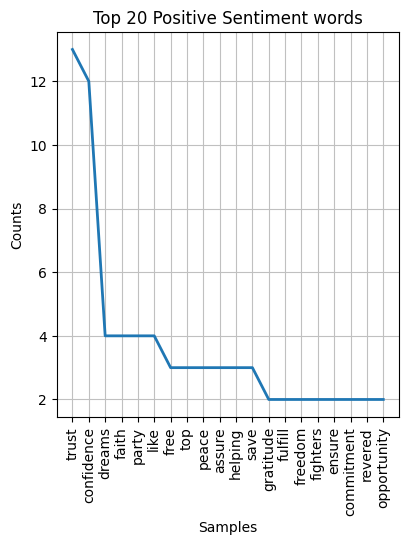

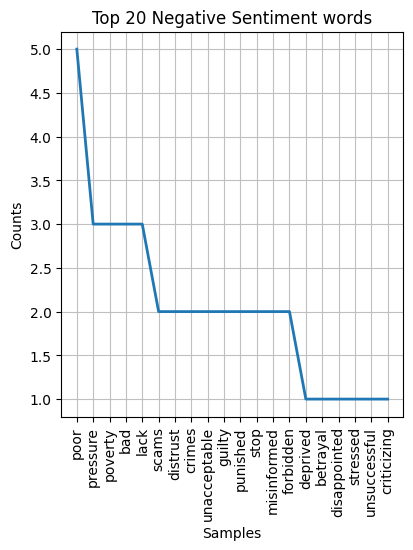

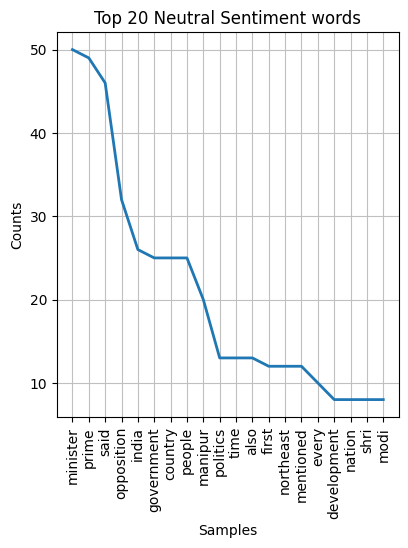

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_positive.plot(20,title="Top 20 Positive Sentiment words")

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20,title="Top 20 Negative Sentiment words")

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20,title="Top 20 Neutral Sentiment words")


plt.tight_layout()
plt.show()

In [21]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])

In [22]:
# Plotting BAR GRaphs
import plotly.express as px
from plotly.subplots import make_subplots

# Create a figure with one row and three columns
fig = make_subplots(rows=1, cols=3, shared_yaxes=True)

# Add the positive sentiment bar plot to the first column
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title="Top 20 Positive Sentiment Words")
fig.add_trace(fig_positive.data[0], row=1, col=1)

# Add the negative sentiment bar plot to the second column
fig_negative = px.bar(df_negative, x='Word', y='Frequency', title="Top 20 Negative Sentiment Words")
fig.add_trace(fig_negative.data[0], row=1, col=2)

# Add the neutral sentiment bar plot to the third column
fig_neutral = px.bar(df_neutral, x='Word', y='Frequency', title="Top 20 Neutral Sentiment Words")
fig.add_trace(fig_neutral.data[0], row=1, col=3)

# Update the layout of the figure
fig.update_layout(height=600, width=1200, showlegend=False)

# Show the figure
fig.show()


In [23]:
# PLOTTING WORD CLOUDS

wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)

**Bilinear Interpolation**:

It takes the weighted average of the four nearest known pixels to estimate the value of the unknown pixel. This method creates smoother transitions and is commonly used in image resizing.

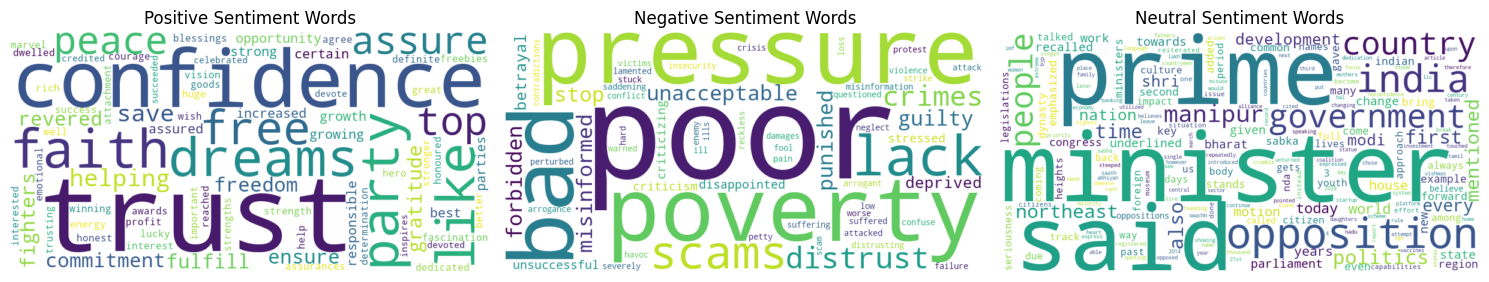

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [25]:
word_freq = nltk.FreqDist(words_lemmatized)
wordcloud = WordCloud(width = 800 , height = 400 , background_color="white").generate_from_frequencies(word_freq)

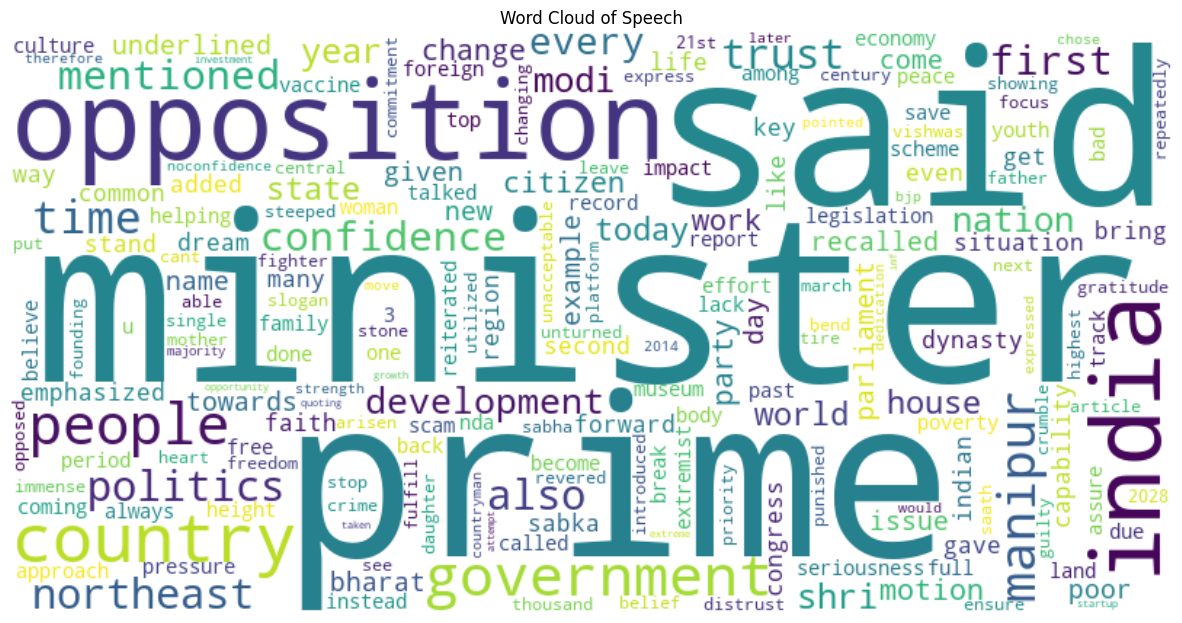

In [26]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

In [27]:
# Summazrizing Percentages

total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 8.614232209737828
Negative Sentiment Percentage: 5.118601747815231
Neutral Sentiment Percentage: 86.26716604244695


In [28]:
# Creating new Data

df = {"Sentiment" : ['Positive' , 'Negative' , 'Neutral'] ,
        "Percentage" : [positive_percentage , negative_percentage , neutral_percentage]
        }

In [29]:
# Creating new Data Frame

df_percentages = pd.DataFrame(df)
df_percentages

Sentiment  Percentage
0  Positive    8.614232
1  Negative    5.118602
2   Neutral   86.267166

In [30]:
# Plotting Overall Graph

fig = px.bar(df_percentages, x='Sentiment', y='Percentage', color='Sentiment',
             labels={'Sentiment': 'Sentiment Category', 'Percentage': 'Percentage (%)'},
             title='Percentage of Words in Each Sentiment Category')
fig.show()

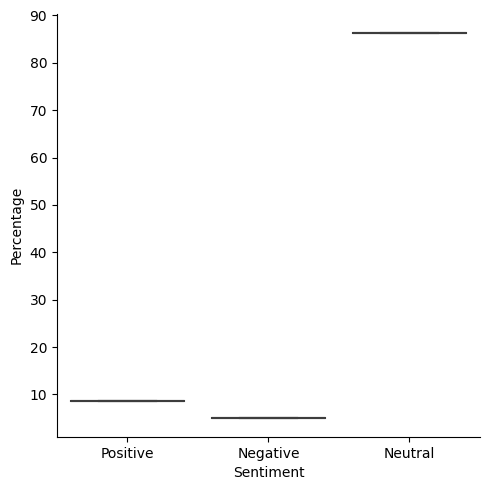

In [31]:
sns.catplot(data=df_percentages, x='Sentiment', y='Percentage',kind="box")

In [32]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

**The corpora Dictionary function is part of the Gensim library, which is a free open-source Python library that can process raw, unstructured digital texts using unsupervised machine learning algorithms. The corpora Dictionary function creates a dictionary that assigns a unique ID to each unique word in the provided list(s) of words**. 

In [33]:
dict = corpora.Dictionary([words_filtered])

**The doc2bow() method takes a document (represented as a list of words) as input and returns a bag of words as output. A bag of words is a common method for representing text data in a format suitable for various natural language processing tasks. A bag of words is a list of tuples, where each tuple contains a word ID (assigned by the dictionary object) and a word count (the number of times the word appears in the document).**

In [34]:
corpus = [dict.doc2bow(words_filtered)]

# Gensim's Latent Dirichlet Allocation (LDA) 
**model to perform topic modeling on a corpus of documents**.

In [35]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dict, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.002*"minister" + 0.002*"said" + 0.002*"prime" + 0.002*"country" + 0.002*"india"')
(1, '0.029*"minister" + 0.028*"prime" + 0.026*"said" + 0.018*"opposition" + 0.015*"india"')
(2, '0.001*"minister" + 0.001*"said" + 0.001*"prime" + 0.001*"country" + 0.001*"opposition"')
(3, '0.001*"minister" + 0.001*"said" + 0.001*"prime" + 0.001*"opposition" + 0.001*"people"')
(4, '0.001*"prime" + 0.001*"said" + 0.001*"opposition" + 0.001*"minister" + 0.001*"india"')


In [36]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(st)
entities = [(ent.text, ent.label_) for ent in doc.ents]

for entity, label in entities:
    print(f"Entity: {entity}, Label: {label}")

Entity: India, Label: GPE
Entity: the 21st century, Label: DATE
Entity: the next thousand years, Label: DATE
Entity: India, Label: GPE
Entity: Today, Label: DATE
Entity: 2028, Label: DATE
Entity: Country, Label: ORG
Entity: 3, Label: CARDINAL
Entity: the Central Government, Label: ORG
Entity: the State Government, Label: ORG
Entity: Manipur, Label: GPE
Entity: Manipur, Label: GPE
Entity: Manipur, Label: GPE
Entity: House, Label: ORG
Entity: Manipur, Label: GPE
Entity: first, Label: ORDINAL
Entity: Northeast, Label: LOC
Entity: Sabka Saath Sabka Vishwas, Label: PERSON
Entity: Parliament, Label: ORG
Entity: Party, Label: ORG
Entity: Parliament, Label: ORG
Entity: The India of today, Label: WORK_OF_ART
Entity: India, Label: GPE
Entity: Shri Narendra Modi, Label: PERSON
Entity: the Motion of No Confidence, Label: ORG
Entity: Lok Sabha, Label: PERSON
Entity: today, Label: DATE
Entity: House, Label: ORG
Entity: India, Label: GPE
Entity: 2018, Label: DATE
Entity: 2019, Label: DATE
Entity: NDA

In [39]:
from keybert import KeyBERT
kw_extractor = KeyBERT()
keywords = kw_extractor.extract_keywords(st)
for keyword in keywords:
    print(keyword[0])

manipur
nehru
bjp
rajya
gandhi


In [40]:
!pip install nrclex

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ------------------------------------- 30.7/636.8 kB 1.3 MB/s eta 0:00:01
     -- ---------------------------------- 41.0/636.8 kB 393.8 kB/s eta 0:00:02
     -- ---------------------------------- 41.0/636.8 kB 393.8 kB/s eta 0:00:02
     --- --------------------------------- 61.4/636.8 kB 328.2 kB/s eta 0:00:02
     ---- -------------------------------- 71.7/636.8 kB 280.5 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 291.5 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 291.5 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/636.8 kB 297.7 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 266.9 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8 kB 283.8 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8 kB 283.8 kB/s eta 0:00:02
     -------- --------------------------- 153.6

In [41]:
from nrclex import NRCLex

text_emot = NRCLex(st_cleaned)

emotions = text_emot.affect_frequencies

for emotion, frequency in emotions.items():
    print(f"Emotion: {emotion}, Frequency: {frequency}")

Emotion: fear, Frequency: 0.10664993726474278
Emotion: anger, Frequency: 0.1053952321204517
Emotion: anticip, Frequency: 0.0
Emotion: trust, Frequency: 0.1329987452948557
Emotion: surprise, Frequency: 0.02258469259723965
Emotion: positive, Frequency: 0.23462986198243413
Emotion: negative, Frequency: 0.1668757841907152
Emotion: sadness, Frequency: 0.04642409033877039
Emotion: disgust, Frequency: 0.033877038895859475
Emotion: joy, Frequency: 0.06524466750313676
Emotion: anticipation, Frequency: 0.08531994981179424


In [42]:
dff1 = {'Emotion': [], 'Frequency': []}
for emotion, frequency in emotions.items():
    dff1['Emotion'].append(emotion)
    dff1['Frequency'].append(frequency)

df_emotions = pd.DataFrame(dff1)

fig = px.bar(df_emotions, x='Emotion', y='Frequency', color='Emotion',
             labels={'Emotion': 'Emotion', 'Frequency': 'Frequency'},
             title='Emotion Frequencies in the Speech')
fig.show()

In [43]:
!pip install textstat

     ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/105.1 kB ? eta -:--:--
     -------------- ---------------------- 41.0/105.1 kB 388.9 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/105.1 kB 388.9 kB/s eta 0:00:01
     --------------------- --------------- 61.4/105.1 kB 363.1 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/105.1 kB 280.5 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/105.1 kB 280.5 kB/s eta 0:00:01
     ------------------------------------ 105.1/105.1 kB 303.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
      --------------------------------------- 0.0/2.0 MB 1.4 MB/s eta 0:00:02
      --------------------------------------- 0.0/2.0 MB 393.8 kB/s eta 0:00:05
     - -------------------------------------- 0.1/2.0 MB 409.6 kB/s eta 0

In [44]:
import textstat

flesch_scr = textstat.flesch_reading_ease(st_cleaned)
flesch_grade = textstat.flesch_kincaid_grade(st_cleaned)
smog_index = textstat.smog_index(st_cleaned)

print(f"Flesch Reading Ease Score: {flesch_scr}")
print(f"Flesch-Kincaid Grade Level: {flesch_grade}")
print(f"SMOG Index: {smog_index}")

Flesch Reading Ease Score: -3018.87
Flesch-Kincaid Grade Level: 1192.8
SMOG Index: 0.0


# NLTK (Natural Language Toolkit) 
**To calculate and print the Pointwise Mutual Information (PMI) scores for bigrams in the cleaned text (speech_text_cleaned)**.

In [45]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

tokens = nltk.word_tokenize(st_cleaned)

bigram_meas = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

pmi_scores = finder.score_ngrams(bigram_meas.pmi)

for bigram, pmi in pmi_scores[:10]:
    print(f"Bigram: {bigram}, PMI: {pmi}")

Bigram: ('135', 'crore'), PMI: 11.576484346796851
Bigram: ('400', 'night'), PMI: 11.576484346796851
Bigram: ('5', 'economies'), PMI: 11.576484346796851
Bigram: ('50000', 'per'), PMI: 11.576484346796851
Bigram: ('account', 'yoga'), PMI: 11.576484346796851
Bigram: ('air', 'travel'), PMI: 11.576484346796851
Bigram: ('almost', 'eradicated'), PMI: 11.576484346796851
Bigram: ('arunachal', 'pradesh'), PMI: 11.576484346796851
Bigram: ('aspirations', 'whatever'), PMI: 11.576484346796851
Bigram: ('azad', 'hind'), PMI: 11.576484346796851
